In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from itertools import permutations
%matplotlib inline

In [22]:
m = int(input("Adjacency matrix A. Reading from a file press 1, manually press 2: "))
if(m==1):
    A = pd.read_csv('A.csv', sep=';')
else: 
    n = int(input("Order of the adjacency matrix A: "))
    a = []
    for i in range(n): 
        print(i+1, "row: ")
        row = input().split()
        for i in range(len(row)):
            row[i] = int(row[i])
        a.append(row)
    print(a)
    A = pd.DataFrame(a)
A.to_numpy()

Adjacency matrix A. Reading from a file press 1, manually press 2: 1


array([[0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0]], dtype=int64)

In [23]:
m = int(input("Adjacency matrix B. Reading from a file press 1, manually press 2: "))
if(m==1):
    B = pd.read_csv('B.csv', sep=';')
else: 
    n = int(input("Order of the adjacency matrix B: "))
    b = []
    for i in range(n): 
        print(i+1, "row: ")
        row = input().split()
        for i in range(len(row)):
            row[i] = int(row[i])
        b.append(row)
    print(b)
    B = pd.DataFrame(b)
B.to_numpy()

Adjacency matrix B. Reading from a file press 1, manually press 2: 1


array([[0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 0]], dtype=int64)

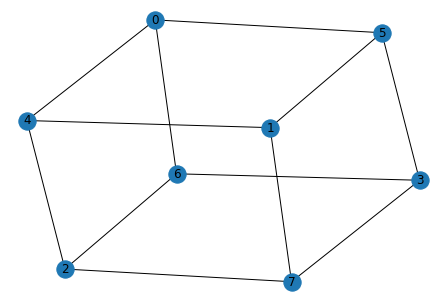

In [24]:
G = nx.from_numpy_matrix(np.matrix(A))
nx.draw(G, with_labels = True)
plt.show()

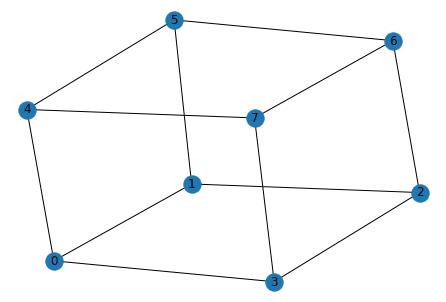

In [25]:
H = nx.from_numpy_matrix(np.matrix(B))
nx.draw(H, with_labels=True)
plt.show()

In [26]:
G_degree_values = dict(G.degree()).values()
H_degree_values = dict(H.degree()).values()
G_spectrum = nx.adjacency_spectrum(G)
H_spectrum = nx.adjacency_spectrum(H)
n = len(G.nodes())
m = len(H.nodes())

def isomorphism(G, H):
    if n != m:
        return print("Graphs are not isomorphic, because the dimension didn't match.")
    
    if ((G_spectrum) != (H_spectrum)).all():
        return print("Graphs are not isomorphic, because the spectrum didn't match.")
    
    if (sorted(G_degree_values) != sorted(H_degree_values)):
        return print("Graphs are not isomorphic, because the degrees of the vertices didn't match.")
    else:
        A_g = nx.adjacency_matrix(G).todense()
        perms = list(permutations(H.nodes(), m))
        for i in perms:
            B_h = nx.adjacency_matrix(H,i).todense()
            if (B_h == A_g).all(): 
                print("The possible isomorphism:", list(zip(G.nodes(), i)))
                return print("Graphs are isomorphic.")
        return print("Graphs are not isomorphic.")

isomorphism(G,H)

The possible isomorphism: [(0, 0), (1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 4), (7, 6)]
Graphs are isomorphic.


In [27]:
def automorphism(G):
    A_g = nx.adjacency_matrix(G).todense()
    perms = list(permutations(G.nodes(), n))
    print("Aut(G):")
    for i in perms:
        A_g_i = nx.adjacency_matrix(G,i).todense()
        if (A_g_i == A_g).all(): 
            print(list(zip(G.nodes(), i)))
            
automorphism(G)

Aut(G):
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7)]
[(0, 0), (1, 1), (2, 3), (3, 2), (4, 5), (5, 4), (6, 6), (7, 7)]
[(0, 0), (1, 2), (2, 1), (3, 3), (4, 4), (5, 6), (6, 5), (7, 7)]
[(0, 0), (1, 2), (2, 3), (3, 1), (4, 6), (5, 4), (6, 5), (7, 7)]
[(0, 0), (1, 3), (2, 1), (3, 2), (4, 5), (5, 6), (6, 4), (7, 7)]
[(0, 0), (1, 3), (2, 2), (3, 1), (4, 6), (5, 5), (6, 4), (7, 7)]
[(0, 1), (1, 0), (2, 2), (3, 3), (4, 4), (5, 5), (6, 7), (7, 6)]
[(0, 1), (1, 0), (2, 3), (3, 2), (4, 5), (5, 4), (6, 7), (7, 6)]
[(0, 1), (1, 2), (2, 0), (3, 3), (4, 4), (5, 7), (6, 5), (7, 6)]
[(0, 1), (1, 2), (2, 3), (3, 0), (4, 7), (5, 4), (6, 5), (7, 6)]
[(0, 1), (1, 3), (2, 0), (3, 2), (4, 5), (5, 7), (6, 4), (7, 6)]
[(0, 1), (1, 3), (2, 2), (3, 0), (4, 7), (5, 5), (6, 4), (7, 6)]
[(0, 2), (1, 0), (2, 1), (3, 3), (4, 4), (5, 6), (6, 7), (7, 5)]
[(0, 2), (1, 0), (2, 3), (3, 1), (4, 6), (5, 4), (6, 7), (7, 5)]
[(0, 2), (1, 1), (2, 0), (3, 3), (4, 4), (5, 7), (6, 6), (7, 5)]
[(0, 2), (1, 1), 